
Regression with Stock Portfolio Performance data -- UCI dataset -- 63 data rows
https://archive.ics.uci.edu/ml/datasets/Stock+portfolio+performance
The dataset is mentioned to have missing values
1990/9/30-2010/6/30, datasets covers the length of period: 80 quarters (20 years)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readFile(filename):
    contents=[]
    file1=open(filename,'r')
    for line in iter(file1):
        if "Annual" in line:
            continue
        line=line.strip()
        contents.append(line.split(','))
    return contents

In [3]:
trainDS=readFile('stock_portfolio_performance_prd_all.csv')

In [4]:
XY=np.array(trainDS)
XY=XY[:,1:8]
XY= XY.astype(np.float)
print(XY[:3])

[[1.    0.    0.    0.    0.    0.    0.532]
 [0.    1.    0.    0.    0.    0.    0.55 ]
 [0.    0.    1.    0.    0.    0.    0.693]]


In [5]:
#header1=['Id','Large B/P','Large ROE','Large S/P','Large Return Rate in the last quarter','Large Market Value','Small systematic Risk','Annual Return','Excess Return','Systematic Risk','Total Risk','Abs. Win Rate','Rel. Win Rate']
header1=['Large B/P','Large ROE','Large S/P','Large Return Rate in the last quarter','Large Market Value','Small systematic Risk','Annual Return']
traindf = pd.DataFrame(XY,columns=header1)

In [6]:
print("Dataframe shape: ",traindf.shape,"\n")

Dataframe shape:  (63, 7) 



In [7]:
traindf.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return
0,1.0,0.0,0.0,0.0,0.0,0.0,0.532
1,0.0,1.0,0.0,0.0,0.0,0.0,0.550
2,0.0,0.0,1.0,0.0,0.0,0.0,0.693
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324
4,0.0,0.0,0.0,0.0,1.0,0.0,0.327


In [8]:
traindf.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.580143
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.133384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525500
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.599000
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.679500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000


In [9]:
print(XY[:3])

[[1.    0.    0.    0.    0.    0.    0.532]
 [0.    1.    0.    0.    0.    0.    0.55 ]
 [0.    0.    1.    0.    0.    0.    0.693]]


In [10]:
from sklearn import preprocessing

/home/eagle/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa252a87780>,
      dtype=object)

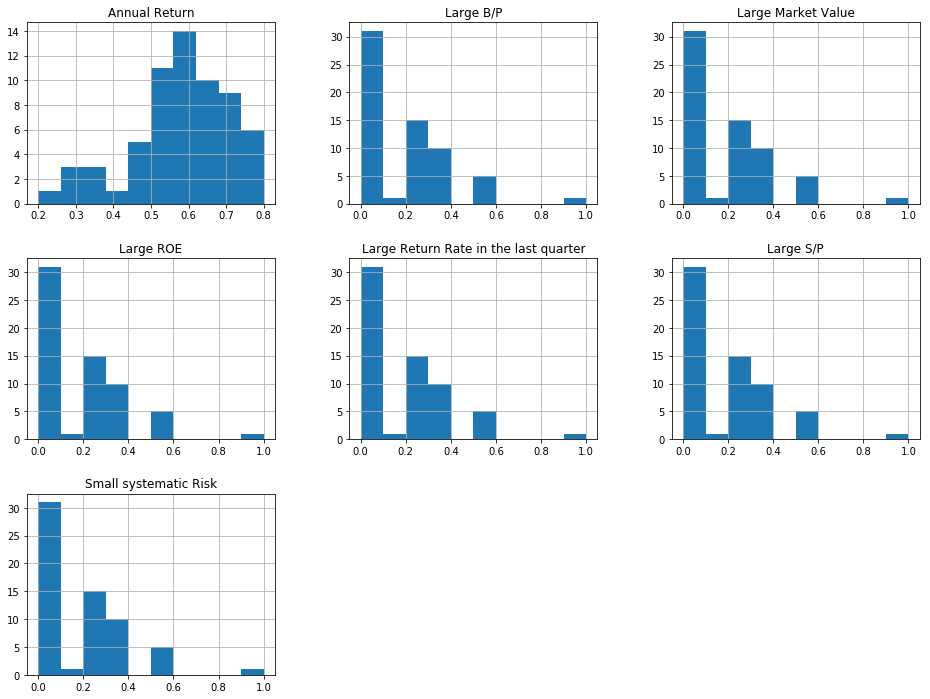

In [11]:
fig = plt.figure(figsize = (16,12))
ax = fig.gca()
traindf.hist(ax = ax)

In [12]:
traindf.corr()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return
Large B/P,1.000000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0.204098
Large ROE,-0.200000,1.000000,-0.200000,-0.200000,-0.200000,-0.200000,0.395606
Large S/P,-0.200000,-0.200000,1.000000,-0.200000,-0.200000,-0.200000,0.432417
Large Return Rate in the last quarter,-0.200000,-0.200000,-0.200000,1.000000,-0.200000,-0.200000,-0.205472
Large Market Value,-0.200000,-0.200000,-0.200000,-0.200000,1.000000,-0.200000,-0.444733
Small systematic Risk,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,1.000000,-0.381853
Annual Return,0.204098,0.395606,0.432417,-0.205472,-0.444733,-0.381853,1.000000


In [13]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 90)
    #labels = ["m","mpg","cylinders","displacement","horsepower","weight","acceleration","year"]
    labels=header1.copy()
    labels[4]="Large Rtrn(LQ)"
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    ax1.set_xticklabels(labels,fontsize=8)
    ax1.set_yticklabels(labels,fontsize=12)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

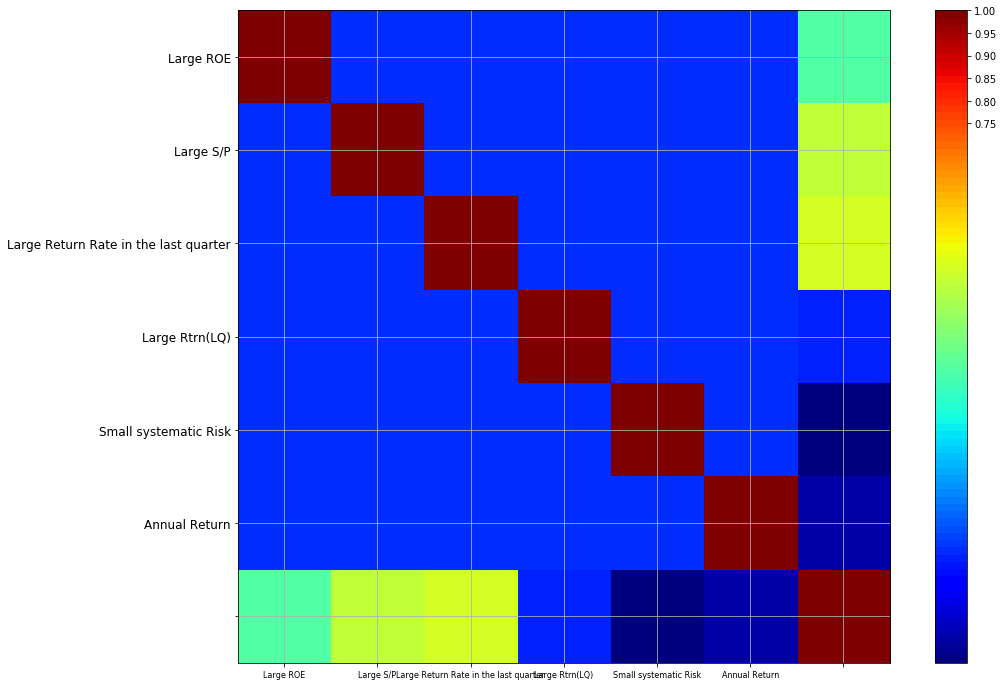

In [14]:
correlation_matrix(traindf)

In [15]:
X = traindf.drop('Annual Return',axis=1)
y = traindf['Annual Return']

In [16]:
# Split data to training and test
from sklearn.model_selection import train_test_split
# Split X and y into train and test data set .75 vs .25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (47, 6)
y_train shape:  (47,)
X_test shape:  (16, 6)
y_test shape:  (16,)


In [17]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge

# Next line is "dictionary" data structure from class 1
d_models = {"Linear_Regression": LinearRegression(),
            "Ridge": Ridge(alpha=0.5),
            "Lasso": Lasso(alpha=0.1),
            "LassoLars": LassoLars(alpha=0.1),
            "BayesianRidge": BayesianRidge()}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge', 'Lasso', 'LassoLars', 'BayesianRidge'])


In [18]:
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X_train,y_train)
    y_predict = regressor.predict(X_test)
    regression_model_mse = mean_squared_error(y_predict, y_test)
    print(regression_model," ",math.sqrt(regression_model_mse))

Linear_Regression   0.06938236233438116
Ridge   0.06380473050915468
Lasso   0.11558522901952739
LassoLars   0.11558522901952739
BayesianRidge   0.06550088127274618


In [19]:
# Training model
from sklearn.linear_model import BayesianRidge
lm = BayesianRidge()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print ("Number of coefficients is ",len(lm.coef_))

0.572893325215775
[ 0.1002434   0.2011385   0.26298039 -0.12341376 -0.2340001  -0.20586436]
Number of coefficients is  6


In [20]:
import math
from sklearn.metrics import mean_squared_error
y_predict = lm.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
print(math.sqrt(regression_model_mse))

0.06550088127274618
